## Generate data and convert it to a pandas DataFrame

In [17]:
# Imports
from sklearn.datasets.samples_generator import make_blobs

X, _ = make_blobs(n_samples=10, centers=3, n_features=2,
                 cluster_std=0.2,  random_state=0)

In [2]:
# Convert the data points into a pandas DataFrame
import pandas as pd

# Generate indicators for the data points
obj_names = []
for i in range(1, 11):
    obj = "Object " + str(i)
    obj_names.append(obj)

# Create a pandas DataFrame with the names and (x, y) coordinates
data = pd.DataFrame({
    'Object': obj_names,
    'X_value': X[:, 0],
    'Y_value': X[:, -1]
})

# Preview the data
data.head()

,Object,X_value,Y_value
0,Object 1,1.005079,4.594642
1,Object 2,1.128478,4.328122
2,Object 3,2.117881,0.726845
3,Object 4,0.955626,4.385907
4,Object 5,-1.354017,2.769449


In [3]:
# Serialize the DataFrame to a .csv file
data.to_csv('data.csv', index=False)

## Basic Data Visualization

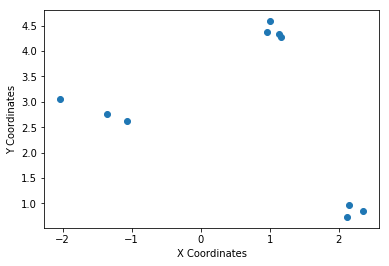

In [4]:
# Scatter plot of the data points
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X[:, 0], X[:, -1])
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')
plt.show()

## Beginning K-Means clustering

In [5]:
# Initialize the centroids
c1 = (-1, 4)
c2 = (-0.2, 1.5)
c3 = (2, 2.5)

In [6]:
# A helper function to calculate the Euclidean diatance between the data points and the centroids
import numpy as np

def calculate_distance(centroid, X, Y):
    distances = []
    
    # Unpack the x and y coordinates of the centroid
    c_x, c_y = centroid
    
    # Iterate over the data points and calculate the distance using the given formula
    for x, y in list(zip(X, Y)):
        root_diff_x = (x - c_x) ** 2
        root_diff_y = (y - c_y) ** 2
        distance = np.sqrt(root_diff_x + root_diff_y)
        distances.append(distance)
    
    return distances

In [7]:
# Calculate the distance and assign them to the DataFrame accordingly
data['C1_Distance'] = calculate_distance(c1, data.X_value, data.Y_value)
data['C2_Distance'] = calculate_distance(c2, data.X_value, data.Y_value)
data['C3_Distance'] = calculate_distance(c3, data.X_value, data.Y_value)

# Preview the data
data.head()

,Object,X_value,Y_value,C1_Distance,C2_Distance,C3_Distance
0,Object 1,1.005079,4.594642,2.091397,3.320997,2.318921
1,Object 2,1.128478,4.328122,2.153620,3.124601,2.025236
2,Object 3,2.117881,0.726845,4.520479,2.443428,1.777070
3,Object 4,0.955626,4.385907,1.993339,3.108686,2.155774
4,Object 5,-1.354017,2.769449,1.280462,1.715592,3.364823


In [8]:
# Get the minimum distance centroids
data['Cluster'] = data[['C1_Distance', 'C2_Distance', 'C3_Distance']].apply(np.argmin, axis =1)

# Map the centroids accordingly and rename them
data['Cluster'] = data['Cluster'].map({'C1_Distance': 'C1', 'C2_Distance': 'C2', 'C3_Distance': 'C3'})

# Get a preview of the data
data.head(5)

C:\Users\Karthik-Sekaran\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return getattr(obj, method)(*args, **kwds)


,Object,X_value,Y_value,C1_Distance,C2_Distance,C3_Distance,Cluster
0,Object 1,1.005079,4.594642,2.091397,3.320997,2.318921,C1
1,Object 2,1.128478,4.328122,2.153620,3.124601,2.025236,C3
2,Object 3,2.117881,0.726845,4.520479,2.443428,1.777070,C3
3,Object 4,0.955626,4.385907,1.993339,3.108686,2.155774,C1
4,Object 5,-1.354017,2.769449,1.280462,1.715592,3.364823,C1


In [9]:
# Get the number of data points in the clusters
from collections import Counter

label_counts = Counter(data['Cluster'].values)
label_counts.most_common()

[('C1', 5), ('C3', 5)]

In [10]:
# Calculate the coordinates of the new centroid from cluster 1
x_new_centroid1 = data[data['Cluster']=='C1']['X_value'].mean()
y_new_centroid1 = data[data['Cluster']=='C1']['Y_value'].mean()

# Calculate the coordinates of the new centroid from cluster 2
x_new_centroid2 = data[data['Cluster']=='C3']['X_value'].mean()
y_new_centroid2 = data[data['Cluster']=='C3']['Y_value'].mean()

# Print the coordinates of the new centroids
print('Centroid 1 ({}, {})'.format(x_new_centroid1, y_new_centroid1))
print('Centroid 2 ({}, {})'.format(x_new_centroid2, y_new_centroid2))

Centroid 1 (-0.500753347459331, 3.4851226841526897)
Centroid 2 (1.7821539902873855, 2.2299026522421928)


## Using scikit-learn to perform K-Means clustering

In [11]:
# Using scikit-learn to perform K-Means clustering
from sklearn.cluster import KMeans

# Specify the number of clusters (3) and fit the data X
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

## Visualize and evaluate the results

In [12]:
# Get the cluster centroids
kmeans.cluster_centers_

array([[-1.48815728,  2.81502145],
       [ 2.20533486,  0.84929168],
       [ 1.06386762,  4.39554682]])

In [13]:
# Get the cluster labels
kmeans.labels_

array([2, 2, 1, 2, 0, 0, 0, 1, 1, 2])

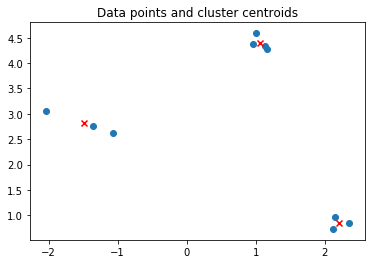

In [14]:
# Plotting the cluster centers and the data points on a 2D plane
plt.scatter(X[:, 0], X[:, -1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
plt.title('Data points and cluster centroids')
plt.show()

In [15]:
# Calculate silhouette_score
from sklearn.metrics import silhouette_score

print(silhouette_score(X, kmeans.labels_))

0.8810668519873337


## Determining the value of K using silhouette_score

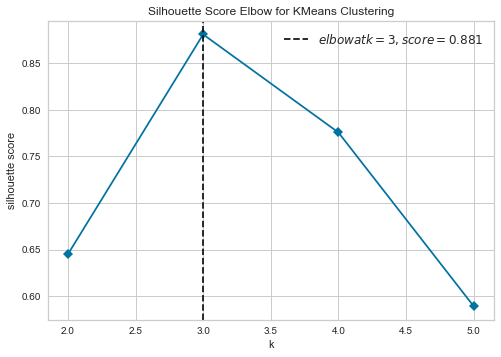

In [16]:
# Import the KElbowVisualizer method 
from yellowbrick.cluster import KElbowVisualizer

# Instantiate a scikit-learn K-Means model
model = KMeans(random_state=0)

# Instantiate the KElbowVisualizer with the number of clusters and the metric 
visualizer = KElbowVisualizer(model, k=(2,6), metric='silhouette', timings=False)

# Fit the data and visualize
visualizer.fit(X)    
visualizer.poof()    